In [1]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

## 수치형 데이터 시각화
#### histplot(), kdeplot(), distplot(), rugplot()

### 히스토그램(histplot)

<AxesSubplot:xlabel='age', ylabel='Count'>

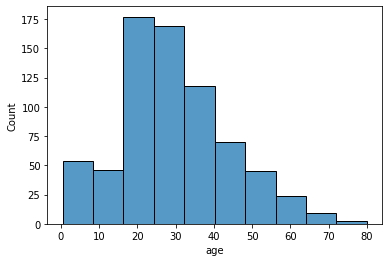

In [2]:
sns.histplot(data=titanic, x='age', bins=10) # default : bins='auto'

<AxesSubplot:xlabel='age', ylabel='Count'>

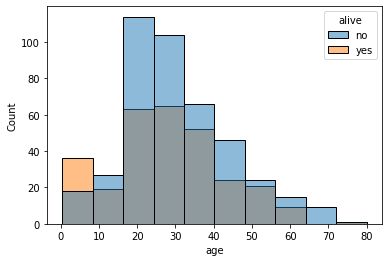

In [3]:
sns.histplot(data=titanic, x='age', hue='alive', bins=10) ## hue 넣기전보다 count가 줄어들음

<AxesSubplot:xlabel='age', ylabel='Count'>

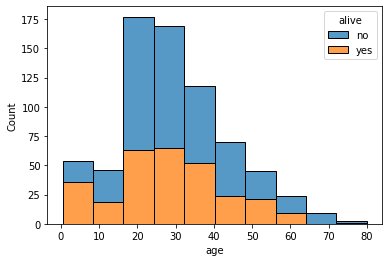

In [4]:
sns.histplot(data=titanic, x='age', hue='alive', multiple='stack', bins=10) ## hue 넣기전과 count가 같음

### 커널밀도추정 함수 그래프 (kdeplot) # 잘사용하지는 않음

<AxesSubplot:xlabel='age', ylabel='Density'>

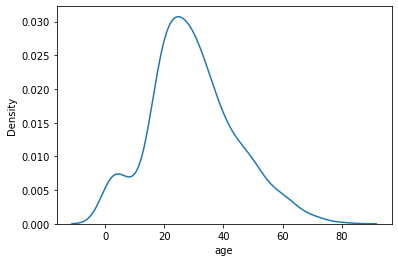

In [5]:
sns.kdeplot(data=titanic, x='age')

<AxesSubplot:xlabel='age', ylabel='Density'>

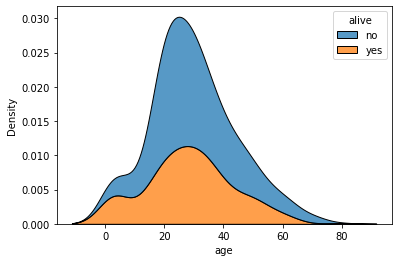

In [6]:
sns.kdeplot(data=titanic, x='age', hue='alive', multiple='stack')

### 분포도 (displot) # hist와 kde를 하나의 함수로 사용할수 있어 많이 사용

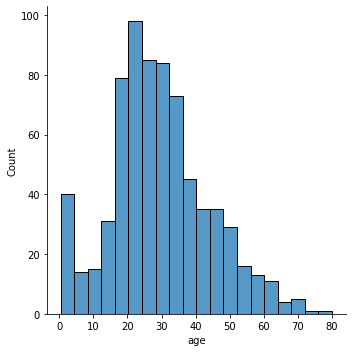

In [7]:
sns.displot(data=titanic, x='age')

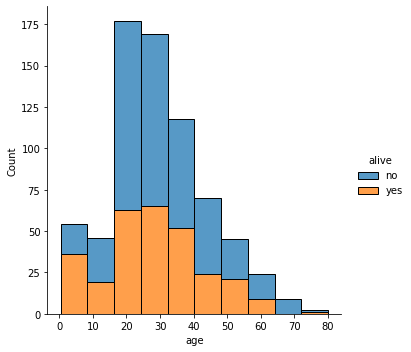

In [8]:
sns.displot(data=titanic, x='age', hue='alive', multiple='stack', bins=10)

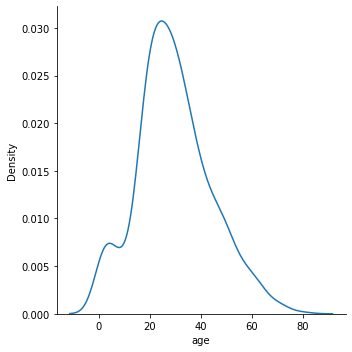

In [9]:
sns.displot(data=titanic, x='age', kind='kde')

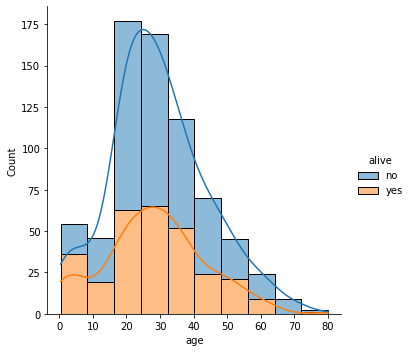

In [10]:
sns.displot(data=titanic, x='age', hue='alive', multiple='stack', kde=True, bins=10)

### 러그플롯 (rugplot)

<AxesSubplot:xlabel='age', ylabel='Density'>

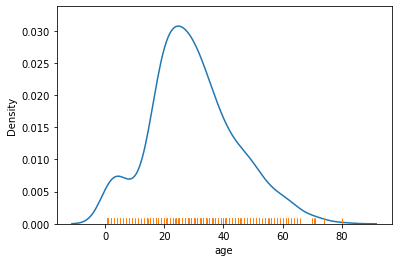

In [11]:
sns.kdeplot(data=titanic, x='age')
sns.rugplot(data=titanic, x='age')

## 범주형 데이터 시각화

### 카운트플롯 (countplot)

<AxesSubplot:xlabel='class', ylabel='count'>

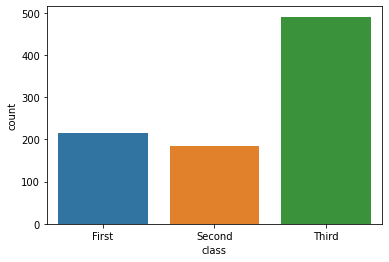

In [19]:
sns.countplot(x='class', data=titanic)
# 피처의 개수만을 확인할 때 사용, 범주형 피처별 연속형 피처 형태를 확인하는 barplot 과는 다르다.

<AxesSubplot:xlabel='count', ylabel='class'>

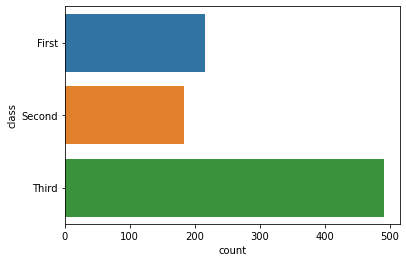

In [18]:
sns.countplot(y='class', data=titanic)

### 막대 그래프 (barplot)

<AxesSubplot:xlabel='class', ylabel='fare'>

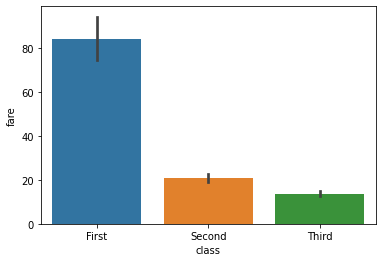

In [12]:
sns.barplot(data=titanic, x='class', y='fare')
# class에 따른 fare의 평균, 신뢰구간 표현
# 복원 샘플링을 통해 신뢰구간을 얻음으로, 표현된 평균과 데이터 전체의 평균이 다를 수 있음
# estimator = np.mean, np.max, np.min 으로 평균, 최대, 최소값 변경 가능

### 포인트플롯 (pointplot)

<AxesSubplot:xlabel='class', ylabel='fare'>

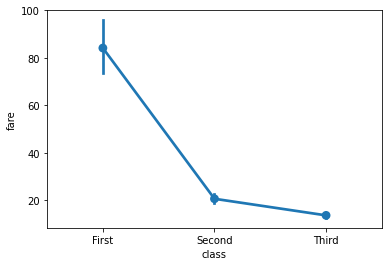

In [13]:
sns.pointplot(x='class', y='fare', data=titanic)
# 막대 그래프와 표현내용은 같다

### 박스플롯 (boxplot)

<AxesSubplot:xlabel='class', ylabel='age'>

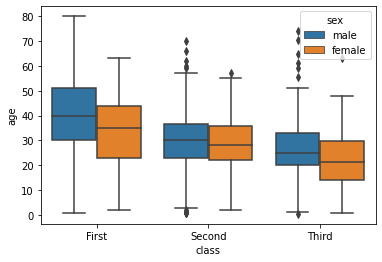

In [14]:
sns.boxplot(data=titanic, x='class', y='age', hue='sex')

### 바이올린플롯 (violinplot)

<AxesSubplot:xlabel='class', ylabel='age'>

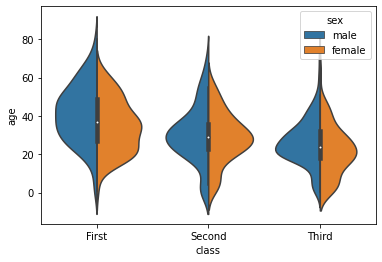

In [16]:
sns.violinplot(x= 'class', y='age', data=titanic, hue= 'sex', split=True)
# 이상치, 최댓값, 3분위수, 2분위수, 1분위수, 최솟값 

### 파이 그래프 (pie)
#### seaborn 모듈에는 없으며, 레이블별 개수를 알고 있어야한다.

([<matplotlib.patches.Wedge at 0x1cf239eebc8>,
 [Text(1.0461621663333946, 0.3399186987098808, 'A'),
  Text(-0.8899187482945419, 0.6465637025335369, 'B'),
  Text(0.6465639524941308, -0.8899185666875186, 'C')],
 [Text(0.5706339089091244, 0.1854101992962986, '10.0%'),
  Text(-0.4854102263424773, 0.3526711104728383, '60.0%'),
  Text(0.35267124681498035, -0.485410127284101, '30.0%')])

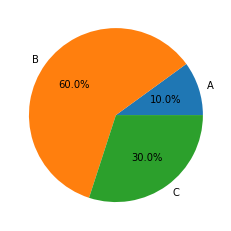

In [21]:
import matplotlib.pyplot as plt

x = [10, 60, 30]
labels = ['A', 'B', 'C']

plt.pie(x=x, labels=labels, autopct='%.1f%%')
# autopct 파라미터로 파이그래프에 표현되는 숫자 제어 가능

## 데이터 관계 보기

### 히트맵 (heatmap)
#### 두 범주형 변수의 관계

In [22]:
import seaborn as sns

flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [23]:
# 데이터 관계를 보기쉽게 변형
flights_pivot = flights.pivot(index='month',
                                columns='year',
                                values='passengers')
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

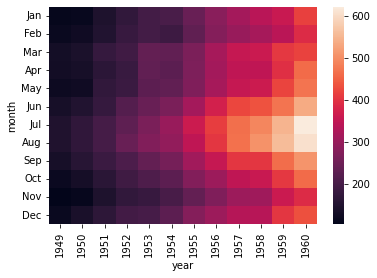

In [24]:
sns.heatmap(data=flights_pivot)

### 라인플롯 (lineplot)
#### 두 연속형 변수의 관계

<AxesSubplot:xlabel='year', ylabel='passengers'>

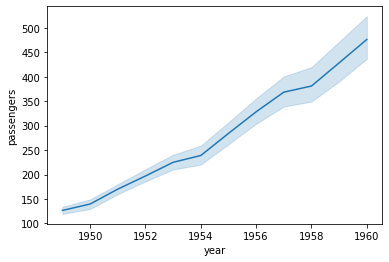

In [27]:
sns.lineplot(x='year', y='passengers', data=flights)
# x에 대한 y의 평균과 95% 신뢰구간을 표현

### 산점도 (scatterplot)

In [28]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

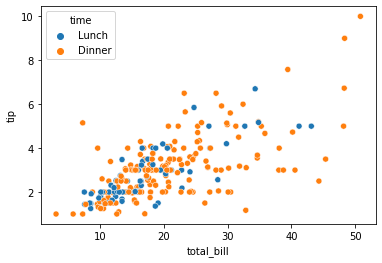

In [29]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='time')

### 회귀선을 포함한 산점도 그래프 (regplot)

<AxesSubplot:xlabel='year', ylabel='passengers'>

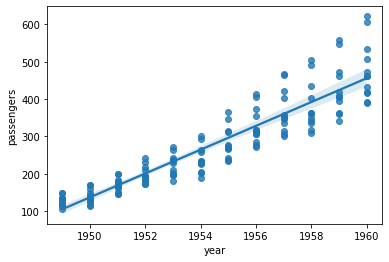

In [31]:
sns.regplot(x='year', y='passengers', data=flights, ci=99)
# lineplot과 대비하여 산점도와 신뢰구간을 조절할 수 있음